In [1]:
import matplotlib.pyplot as plt
import numpy as np
from SocialNetwork.social_network_environment import *
from SocialNetwork.cascade import *
from Advertising.enviroment.bid import *
from Advertising.enviroment.VCG import *
from Advertising.learners.Greedy_algorithm import *
from Advertising.learners.GTS_Learner import *
from Advertising.learners.GTS_SW_Learner import *
from experiment_utilities import*
from Advertising.learners.UCB_sw import*

import math

from tqdm.autonotebook import tqdm
from Advertising.learners.TS_sliding_window import *
import itertools

arms = arms_creation(seed=30291, number_of_arms=20)

seed = 6789
random.seed(seed)
only_first = True
#initialization
n_try = 1
variance = 200
expected_values = []
interval = 5000
n_experiments=20000
sw_size = 3000
#sw_size = math.isqrt(n_experiments)
n_change = (int)(n_experiments/interval)
exploration=4.2

lambdas = [0.5, 0.42, 0.38, 0.30, 0.2, 0.05]
social_network = social_network_environment()
social_network.init_from_json(
    json_path_network='Config/network.json', json_path_features='Config/features.json')




with open("Config/estimated_influence.json", "r"):
    data = json.load(open("Config/estimated_influence.json"))

active_by_influence_reward = np.array(data.get("estimated_influence"))



with open('Config/clairvoyants_sw.json', 'r') as file:
    clairvoyants = json.load(file)
clairvoyants_first = clairvoyants.get('clairvoyant_f_sw')
clairvoyants_all = clairvoyants.get('clairvoyant_a_sw')


with open('Config/bids.json', 'r') as file:
    bids = json.load(file)
    list_of_bids = bids.get('bids')
#print(list_of_bids)

In [2]:
ts_learner = GTS_SW_Learner(arms, variance=variance, size_SW=sw_size, ad_id=1)
ucb_learner = UCB_sw(arms = arms, hyperpar= exploration, window_size= sw_size)


In [3]:
moving_avarage_only_mean_ts = []

moving_avarage_only_ts = experiment(n_experiments, ts_learner, list_of_bids, social_network, arms, only_first, sliding_window = True, interval=interval)
moving_avarage_only_mean_ts.append(moving_avarage_only_ts)
cum_mov_avarage_only_ts = np.cumsum(np.mean(moving_avarage_only_mean_ts, axis=0))

  0%|          | 0/20000 [00:00<?, ?it/s]

In [4]:
print(cum_mov_avarage_only_ts[-1])

11978.489624360784


In [5]:
moving_avarage_only_mean_ucb = []

moving_avarage_only_ucb = experiment(n_experiments, ucb_learner, list_of_bids, social_network, arms, only_first, sliding_window = True, interval=interval)
moving_avarage_only_mean_ucb.append(moving_avarage_only_ucb)
cum_mov_avarage_only_ucb = np.cumsum(np.mean(moving_avarage_only_mean_ucb, axis=0))


  0%|          | 0/20000 [00:00<?, ?it/s]

In [6]:
print(cum_mov_avarage_only_ucb[-1])

21413.129779780484


In [7]:
clairvoyant_non_cum_only = []
for i in range(0, len(clairvoyants_first)):
    for j in range(0, interval):
        #clairvoyant_non_cum.append(expected_values_list_only[i][index])
        clairvoyant_non_cum_only.append(clairvoyants_first[i])

clairvoyant_cum_only = clairvoyant_non_cum_only.append(clairvoyant_non_cum_only[-1])
clairvoyant_cum_only = np.cumsum(clairvoyant_non_cum_only)


Graphic for confront with ads only in first position


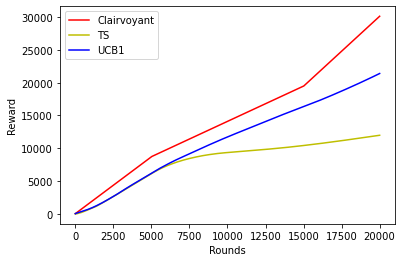

In [8]:
print("Graphic for confront with ads only in first position")

plt.figure(1)
plt.ylabel("Reward")
plt.xlabel("Rounds")
plt.plot(clairvoyant_cum_only, 'r')
plt.plot(cum_mov_avarage_only_ts, 'y')
plt.plot(cum_mov_avarage_only_ucb, 'b')
plt.legend(["Clairvoyant", "TS", "UCB1" ])

In [9]:
ts_learner2 = GTS_SW_Learner(arms, variance=variance, size_SW=sw_size, ad_id=1)
ucb_learner2 = UCB_sw(arms = arms, hyperpar= exploration, window_size= sw_size)

In [10]:
moving_avarage_all_mean_ts = []

moving_avarage_all_ts = experiment(n_experiments, ts_learner2, list_of_bids, social_network, arms, not only_first, sliding_window = True, interval=interval)
moving_avarage_all_mean_ts.append(moving_avarage_all_ts)
cum_mov_avarage_all_ts = np.cumsum(np.mean(moving_avarage_all_mean_ts, axis=0))

  0%|          | 0/20000 [00:00<?, ?it/s]

In [11]:
moving_avarage_all_mean_ucb = []

moving_avarage_all_ucb = experiment(n_experiments, ucb_learner2, list_of_bids, social_network, arms, not only_first, sliding_window = True, interval=interval)
moving_avarage_all_mean_ucb.append(moving_avarage_all_ucb)
cum_mov_avarage_all_ucb = np.cumsum(np.mean(moving_avarage_all_mean_ucb, axis=0))

  0%|          | 0/20000 [00:00<?, ?it/s]

In [12]:
clairvoyant_non_cum_all = []
for i in range(0, len(clairvoyants_all)):
    for j in range(0, interval):
        #clairvoyant_non_cum.append(expected_values_list_only[i][index])
        clairvoyant_non_cum_all.append(clairvoyants_all[i])

clairvoyant__non_cum_all = clairvoyant_non_cum_all.append(clairvoyant_non_cum_all[-1])
clairvoyant_cum_all = np.cumsum(clairvoyant_non_cum_all)


Graphic for confront with all ads


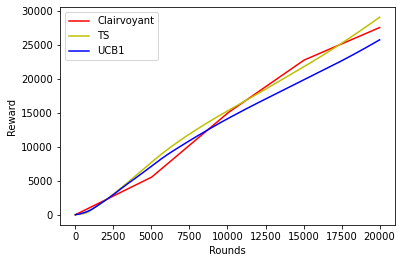

In [13]:
print("Graphic for confront with all ads")

plt.figure(1)
plt.ylabel("Reward")
plt.xlabel("Rounds")
plt.plot(clairvoyant_cum_all, 'r')
plt.plot(cum_mov_avarage_all_ts, 'y')
plt.plot(cum_mov_avarage_all_ucb, 'b')
plt.legend(["Clairvoyant", "TS", "UCB1" ])